#### Домашнее задание. Линейная регрессия. Закон Оукена. Кирилл Эткаленко ПМ23_1

In [301]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import *
from sklearn.linear_model import LinearRegression

Получаем датасет со всеми ВВП стран с 1960 до 2023 года

In [4]:
gdp = pd.read_csv('gdp_netherlands.csv', skiprows=3)

In [6]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.342517,166.263682,171.961916,182.018479,192.639989,202.847824,...,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,122.193931,127.732834,134.130071,139.291222,148.821355,156.314136,...,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620,NaN


Берем только Нидерланды

In [19]:
nl_gdp = gdp[gdp['Country Code'] == 'NLD'].copy()

Очищаем данные

In [20]:
nl_gdp.drop(columns=['Unnamed: 68'], inplace=True)

In [25]:
nl_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
176,Netherlands,NLD,GDP per capita (current US$),NY.GDP.PCAP.CD,1154.686609,1252.576848,1340.395593,1434.775681,1665.879163,1845.38214,...,52900.537415,45193.403219,46039.105928,48675.222335,53044.532435,52476.273253,52162.570115,58727.870547,57025.012456,62536.73203


In [30]:
nl_gdp = nl_gdp.iloc[:, 4:].squeeze(axis=0)
nl_gdp

1960     1154.686609
1961     1252.576848
1962     1340.395593
1963     1434.775681
1964     1665.879163
            ...     
2019    52476.273253
2020    52162.570115
2021    58727.870547
2022    57025.012456
2023    62536.732030
Name: 176, Length: 64, dtype: float64

<Axes: >

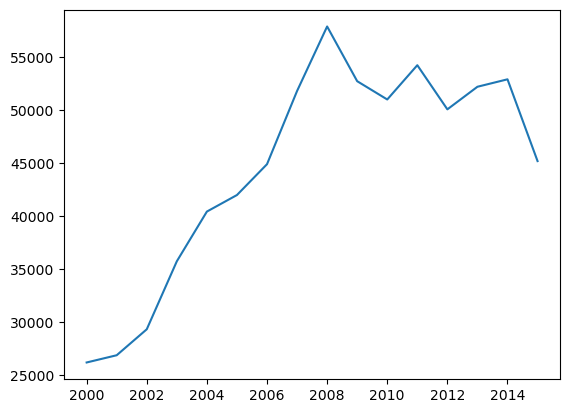

In [38]:
nl_gdp.loc['2000':'2015'].plot()

## Безработица

In [42]:
unemployment = pd.read_csv('./unemployment_netherlands.csv', skiprows=3)
unemployment.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11.184000,NaN,NaN,11.71,5.679,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.991771,NaN,7.120584,NaN,NaN,3.031437,NaN,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16.497000,NaN,15.799,NaN,NaN,NaN


In [49]:
nl_unemp = unemployment[unemployment['Country Code'] == 'NLD'].iloc[:, 4:-1].squeeze(axis=0)
nl_unemp

1960      NaN
1961      NaN
1962      NaN
1963      NaN
1964      NaN
        ...  
2019    3.379
2020    3.820
2021    4.209
2022    3.526
2023    3.537
Name: 176, Length: 64, dtype: float64

In [51]:
nl_unemp.isna()

1960     True
1961     True
1962     True
1963     True
1964     True
        ...  
2019    False
2020    False
2021    False
2022    False
2023    False
Name: 176, Length: 64, dtype: bool

In [58]:
nl_unemp.drop(labels=nl_unemp[nl_unemp.isna() == True].index, inplace=True)

In [61]:
nl_unemp.head(10)

1975     6.000
1977     5.880
1979     6.160
1981     7.920
1983    11.851
1985    10.480
1987     9.898
1988     9.369
1989     8.704
1990     7.671
Name: 176, dtype: float64

In [71]:
nl_unemp.index

Index(['1975', '1977', '1979', '1981', '1983', '1985', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [185]:
nl_gdp = nl_gdp[nl_unemp.index]
nl_gdp

1975     7335.508997
1977     9166.808195
1979    12798.543246
1981    11520.447872
1983    10680.359042
1985     9926.129971
1987    16709.559677
1988    17744.501384
1989    17397.691683
1990    21290.860383
1991    21732.230762
1992    23904.037415
1993    23122.410767
1994    24646.314310
1995    29258.134349
1996    29006.809445
1997    26700.537134
1998    27885.808382
1999    28272.643249
2000    26214.498550
2001    26896.548111
2002    29343.244996
2003    35750.974663
2004    40436.618231
2005    41994.713531
2006    44900.938144
2007    51799.208552
2008    57879.943755
2009    52722.213057
2010    50999.745117
2011    54230.312903
2012    50070.141605
2013    52198.897561
2014    52900.537415
2015    45193.403219
2016    46039.105928
2017    48675.222335
2018    53044.532435
2019    52476.273253
2020    52162.570115
2021    58727.870547
2022    57025.012456
2023    62536.732030
Name: 176, dtype: float64

 Строим графики

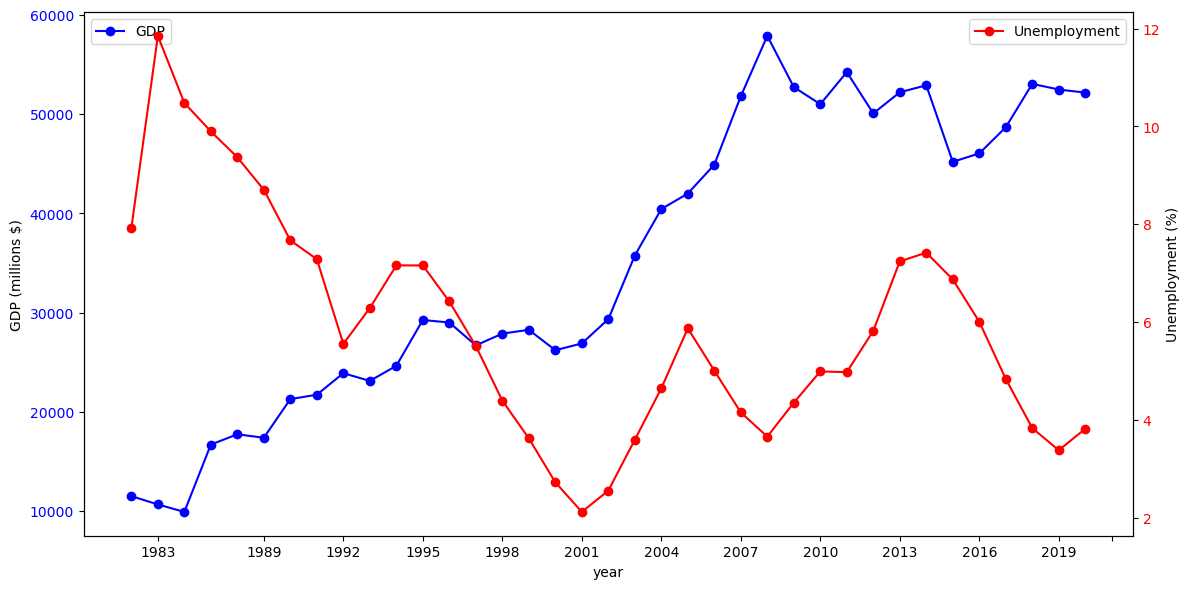

In [512]:
fig, ax1 = plt.subplots(figsize=(12, 6))

start_year = '1980'

ax1.set_xlabel('year')
ax1.set_ylabel('GDP (millions $)')
ax1.plot(nl_gdp[start_year:'2020'], marker='o', color='b', label='GDP')
ax1.tick_params(axis='y', labelcolor='b')

xticks = map(str, np.arange(1980, 2021, 3))
ax1.set_xticks(list(xticks))


ax2= ax1.twinx()
ax2.set_ylabel('Unemployment (%)')
ax2.plot(nl_unemp[start_year:'2020'], marker='o', color='r', label='Unemployment')
ax2.tick_params(axis='y', labelcolor='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.tight_layout()
fig.savefig('GDP_Unemployment.jpg');

На графиках видно, как ВВП влияет на безработицу. Чем больше ВВП, тем меньше процент безработицы. Такая зависимость называется обратная пропорциональность

Рассчитаем коэффициент корреляции Пирсона

## Выдвинем основную и альтернативную гипотезу

H0 : $\rho_{xy} = 0$    
H1 : $\rho_{xy} \neq 0$ 

In [348]:
start = '1980'

In [349]:
gdp_from = nl_gdp[start:'2020']

In [350]:
unemp_from = nl_unemp[start:'2020']

In [351]:
corr, p_value  = pearsonr(gdp_from, unemp_from)
print(f'Коэффицент корреляции: {corr}')

t_rasch = t.ppf(1 - p_value / 2, 13)
print(f'Расчетное распределение стъюдента: {t_rasch}')

alpha = 0.05
t_tabl = t.ppf(1 - alpha / 2, 13)
print(f'Табличное распределение стъюдента: {t_tabl}')

Коэффицент корреляции: -0.5528404148342652
Расчетное распределение стъюдента: 4.738115856359611
Табличное распределение стъюдента: 2.1603686564610127


$ T_{расч} > T_{табл} \Rightarrow H_0$ отвергается   
Тогда $\rho_{xy} $    статистически значим 

## Строим регрессию

In [407]:
def predict_y(b0, b1, x):
    return b0 + b1*x

In [408]:
def regression_std(y, y_pred, n):
    return (np.sum((y - y_pred)**2) / (n - 2))**0.5

In [409]:
def create_S_b0(S, x, n):
    return S * (np.sum(x**2) / (n * np.sum((x - x.mean())**2)))**0.5

In [410]:
def create_S_b1(S, x):
    return S * (1 / np.sum((x - x.mean())**2))**0.5

In [411]:
model = LinearRegression(  )

In [412]:
model.fit(unemp_from.values.reshape(-1, 1), gdp_from.values.reshape(-1, 1))

LinearRegression()

In [413]:
b0 = model.intercept_[0]
b0

56331.35869479604

In [414]:
b1 = model.coef_[0][0]
b1

-3585.029390069283

In [415]:
y_pred = predict_y(b0, b1, unemp_from)

In [416]:
S = regression_std(gdp_from, y_pred, 15)
S

20617.84057131195

In [417]:
S_b0 = create_S_b0(S, unemp_from, 15)
S_b0

14805.27006894682

In [418]:
S_b1 = create_S_b1(S, unemp_from)
S_b1

1498.704271630212

In [419]:
t_rasch_b0 = b0 / S_b0
t_rasch_b0, t_tabl

(3.8048180433363212, 2.1603686564610127)

In [420]:
t_rasch_b1 = b1 / S_b1
abs(t_rasch_b1), t_tabl

(2.3920859224413076, 2.1603686564610127)

$ B_{0_{расч}} > B_{0_{табл}} \Rightarrow B_0 $ статистически значимо

$ B_{1_{расч}} > B_{1_{табл}} \Rightarrow B_1 $ статистически значимо

## Проверим значимость уравнения

In [421]:
alpha = 0.95
nu_1 = 1
F_tabl = f.ppf(alpha, nu_1, 13)

In [422]:
F_rasch = (13)*corr**2 / (1 - corr**2)
F_rasch, F_tabl

(5.722075060341882, 4.667192731826848)

$F_{расч} > F_{табл} \Rightarrow $ уравнение регрессии статистически значимо

## Построим график и посчитаем точность модели

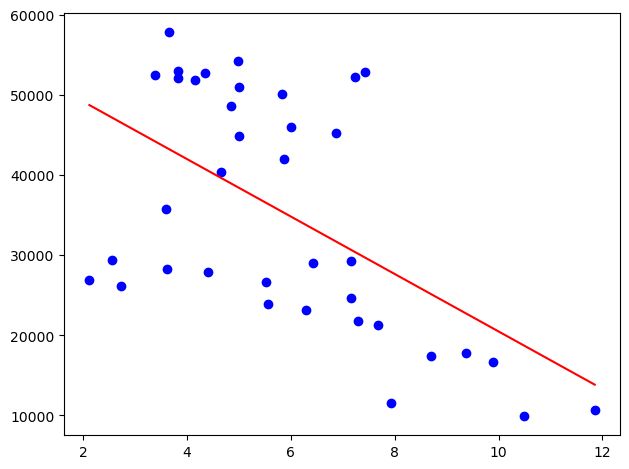

In [511]:
color = 'b'
plt.scatter(unemp_from, gdp_from, color=color)
xx = np.linspace(unemp_from.min(), unemp_from.max(), 100).reshape(-1, 1)
plt.plot(xx, model.predict(xx), color='r')
plt.tight_layout()
plt.savefig('regression.jpg')
plt.show()


In [424]:
model.score(unemp_from.values.reshape(-1, 1), gdp_from)

0.30563252427412224

In [442]:
df = pd.concat([gdp_from, unemp_from], axis=1)
df.columns = ['GDP', 'Unemployment %']
df.head(15)

,GDP,Unemployment %
1981,11520.447872,7.920
1983,10680.359042,11.851
1985,9926.129971,10.480
1987,16709.559677,9.898
1988,17744.501384,9.369
1989,17397.691683,8.704
1990,21290.860383,7.671
1991,21732.230762,7.285
1992,23904.037415,5.555
1993,23122.410767,6.287


In [445]:
df['GDP increase rate'] = round(df['GDP'].pct_change(periods=1) * 100, 3)

In [446]:
df.head()

,GDP,Unemployment %,GDP increase rate
1981,11520.447872,7.920,NaN
1983,10680.359042,11.851,-7.292
1985,9926.129971,10.480,-7.062
1987,16709.559677,9.898,68.339
1988,17744.501384,9.369,6.194


In [448]:
df['Unemployment diff'] = df['Unemployment %'].diff(periods=1)

In [449]:
df.head()

,GDP,Unemployment %,GDP increase rate,Unemployment diff
1981,11520.447872,7.920,NaN,NaN
1983,10680.359042,11.851,-7.292,3.931
1985,9926.129971,10.480,-7.062,-1.371
1987,16709.559677,9.898,68.339,-0.582
1988,17744.501384,9.369,6.194,-0.529


In [450]:
df['Normal GDP'] = 2.5

In [451]:
df.head()

,GDP,Unemployment %,GDP increase rate,Unemployment diff,Normal GDP
1981,11520.447872,7.920,NaN,NaN,2.5
1983,10680.359042,11.851,-7.292,3.931,2.5
1985,9926.129971,10.480,-7.062,-1.371,2.5
1987,16709.559677,9.898,68.339,-0.582,2.5
1988,17744.501384,9.369,6.194,-0.529,2.5


In [461]:
df['Ouken coefficient'] = -1 * df['Unemployment diff'] / (df['GDP increase rate'] - df['Normal GDP'])

In [462]:
df.head()

,GDP,Unemployment %,GDP increase rate,Unemployment diff,Normal GDP,Ouken coefficient
1981,11520.447872,7.920,NaN,NaN,2.5,NaN
1983,10680.359042,11.851,-7.292,3.931,2.5,0.401450
1985,9926.129971,10.480,-7.062,-1.371,2.5,-0.143380
1987,16709.559677,9.898,68.339,-0.582,2.5,0.008840
1988,17744.501384,9.369,6.194,-0.529,2.5,0.143205


In [466]:
df['Ouken coefficient'].mean()

0.08048861444886087

In [467]:
df['mean Ouken coefficient'] = df['Ouken coefficient'].mean()

In [488]:
df.dropna(inplace=True)

In [500]:
df.index

Index(['1983', '1985', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

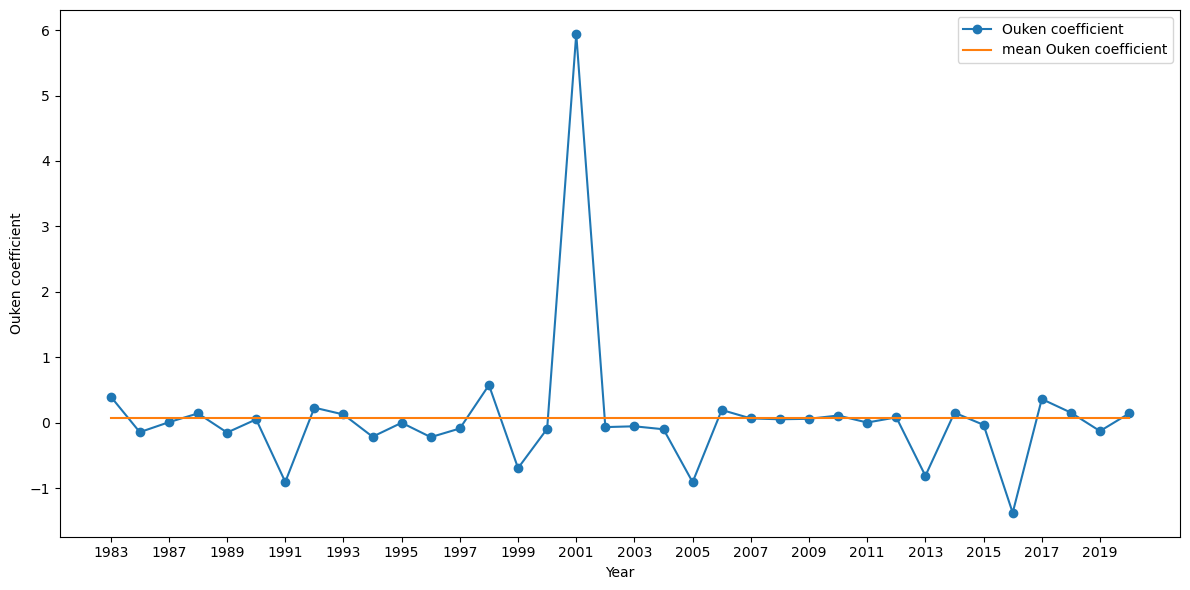

In [509]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df['Ouken coefficient'], marker='o', label='Ouken coefficient')
ax.plot(df['mean Ouken coefficient'], label='mean Ouken coefficient')
ax.set_xticks(df.index[::2])
ax.set_ylabel('Ouken coefficient')
ax.set_xlabel('Year')
ax.legend()
fig.tight_layout()

fig.savefig('ouken.jpg');

За 40 лет видим всего несколько больших отклонений от среднего коэффициента Оукена